# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv5
* Train YOLOv5 to recognize the objects in our dataset
* Evaluate our YOLOv5 model's performance
* Run test inference to view our model at work



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

# Step 1: Install Requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 9914, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9914 (delta 0), reused 1 (delta 0), pack-reused 9906
Receiving objects: 100% (9914/9914), 10.26 MiB | 7.16 MiB/s, done.
Resolving deltas: 100% (6871/6871), done.
Checking out files: 100% (104/104), done.
/content/gdrive/MyDrive/capstone_cornbot_yolo/yolov5
     |████████████████████████████████| 596 kB 4.2 MB/s 
     |████████████████████████████████| 145 kB 3.9 MB/s 
     |████████████████████████████████| 178 kB 40.6 MB/s 
     |████████████████████████████████| 1.1 MB 16.1 MB/s 
     |████████████████████████████████| 138 kB 50.5 MB/s 
     |████████████████████████████████| 62 kB 778 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you

# Step 2: Assemble Our Dataset

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

In Roboflow, you can choose between two paths:

* Convert an existing dataset to YOLOv5 format. Roboflow supports over [30 formats object detection formats](https://roboflow.com/formats) for conversion.
* Upload raw images and annotate them in Roboflow with [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-annotate.gif)

# Version

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-preprocessing.png)

# Export

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-export.png)

# Download Code 

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-snippet.png)

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gsHNo0WMasdCsshlUDAL")
project = rf.workspace().project("cornbot_nlb")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/cornbot_nlb-1 in yolov5pytorch:: 100%|██████████| 252/252 [00:00<00:00, 715.26it/s]


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/gdrive/MyDrive/capstone_cornbot_yolo/yolov5/cornbot_nlb-1"

In [ ]:
#after following the link above, recieve python code with these fields filled in
#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR API KEY HERE")
#project = rf.workspace().project("YOUR PROJECT")
#dataset = project.version("YOUR VERSION").download("yolov5")

Extracting Dataset Version Zip to /content/datasets/American-Mushrooms-1 in yolov5pytorch:: 100%|██████████| 278/278 [00:00<00:00, 1046.33it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/cornbot_nlb-1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-89-g540ef0d torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, t

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 687.

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
!python detect.py --weights /content/gdrive/MyDrive/capstone_cornbot_yolo/yolov5/runs/train/exp6/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['/content/gdrive/MyDrive/capstone_cornbot_yolo/yolov5/runs/train/exp6/weights/best.pt'], source=/content/datasets/cornbot_nlb-1/test/images, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-89-g540ef0d torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/datasets/cornbot_nlb-1/test/images/DSC00034_JPG.rf.ef39a8407ad36400689b5c774b9af49a.jpg: 416x416 1 blight, Done. (0.028s)
image 2/5 /content/datasets/cornbot_nlb-1/test/images/DSC00041_JPG.rf.272d990a68a49548e2ed15f75e22c8a4.jpg: 416x416 Done. (0.028s)
image 3/5 /content/datasets/cornbot_nlb-1/test/im

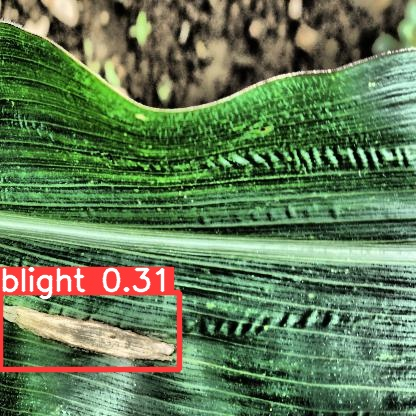

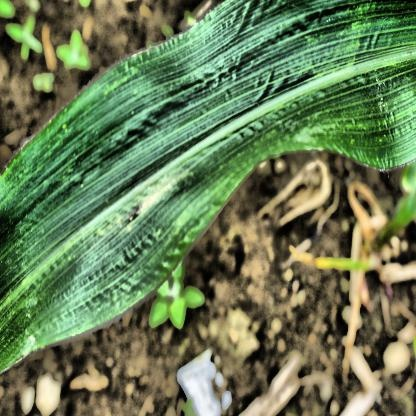

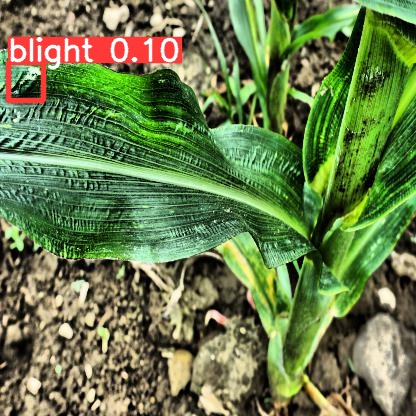

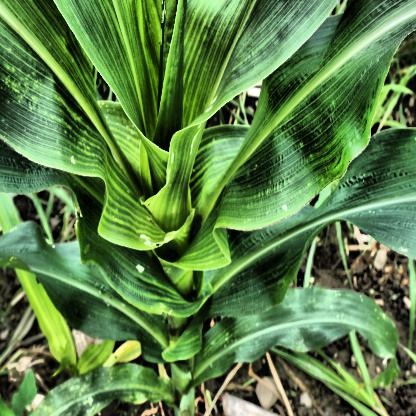

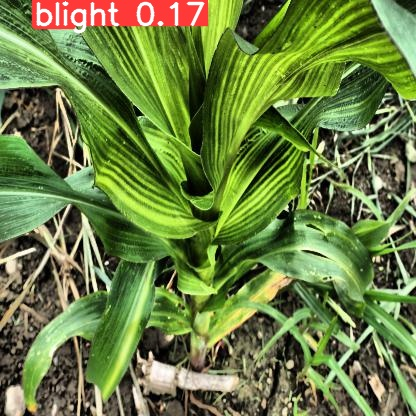

In [ ]:
#display inference on ALL test images
 
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/gdrive/MyDrive/capstone_cornbot_yolo/yolov5/runs/detect/exp5/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp6/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LOCal inference

In [ ]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 596 kB 4.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Inference

In [ ]:
import torch
model = torch.hub.load('/content/drive/MyDrive/capstone_cornbot_yolo/yolov5', 'custom', path='/content/drive/MyDrive/capstone_cornbot_yolo/yolov5/runs/train/exp6/weights/best.pt', source='local')  # local repo

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /content/drive/MyDrive/capstone_cornbot_yolo/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 v6.0-89-g540ef0d torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
pip install 

ERROR: Could not find a version that satisfies the requirement IO (from versions: none)
ERROR: No matching distribution found for IO


In [ ]:
import cv2
import torch
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

img1 = Image.open('/content/drive/MyDrive/capstone_cornbot_yolo/yolov5/cornbot_nlb-1/test/images/DSC00034_JPG.rf.ef39a8407ad36400689b5c774b9af49a.jpg')  # PIL image


# Inference
results = model(img1, size=416)  # includes NMS

# Results
# results.print()  
# results.save()  # or .show()

results.imgs # array of original images (as np array) passed to model for inference
results.render()  # updates results.imgs with boxes and labels
for img in results.imgs:
    print(img.shape)
    plt.imshow(img)
    buffered = BytesIO()
    img_base64 = Image.fromarray(img)
    img_base64.save(buffered, format="JPEG")
    print(base64.b64encode(buffered.getvalue()).decode('utf-8'))  # base64 encoded image with results

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


(416, 416, 3)
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGgAaADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDiW02C78f6o0SK4EzEj0OapeJ9Nezm8mOFoyU7+3PFdt4G04X2qX+ozR8ySHr35NdldaRZ3Zc3EEb84G4ZxXE6nK/Q35Lo8s8C+KmtRFYzZyW2g59a724vSrFpTgZOK8r8Waf/AGJ4zAs02w5WQBe3t7V01j

,xmin,ymin,xmax,ymax,confidence,class,name
0,0.0,292.629456,178.850098,369.209351,0.305449,0,blight


In [ ]:
results.imgs # array of original images (as np array) passed to model for inference
x = results.render()[0]

In [ ]:
plt.imshow(x)
plt.show()
plt.savefig("A.jpg")